epoch: 0, loss: 2.29, train_acc: 0.11
epoch: 0, loss: 0.44, train_acc: 0.84
epoch: 0, loss: 0.34, train_acc: 0.88
epoch: 0, loss: 0.33, train_acc: 0.90
epoch: 1, loss: 0.24, train_acc: 0.94
epoch: 1, loss: 0.23, train_acc: 0.94
epoch: 1, loss: 0.24, train_acc: 0.94
epoch: 1, loss: 0.22, train_acc: 0.95
epoch: 2, loss: 0.16, train_acc: 0.94
epoch: 2, loss: 0.20, train_acc: 0.96
epoch: 2, loss: 0.20, train_acc: 0.95
epoch: 2, loss: 0.20, train_acc: 0.96
epoch: 3, loss: 0.08, train_acc: 0.97
epoch: 3, loss: 0.16, train_acc: 0.96
epoch: 3, loss: 0.15, train_acc: 0.96
epoch: 3, loss: 0.14, train_acc: 0.96
epoch: 4, loss: 0.04, train_acc: 0.99
epoch: 4, loss: 0.17, train_acc: 0.97
epoch: 4, loss: 0.12, train_acc: 0.97
epoch: 4, loss: 0.13, train_acc: 0.96


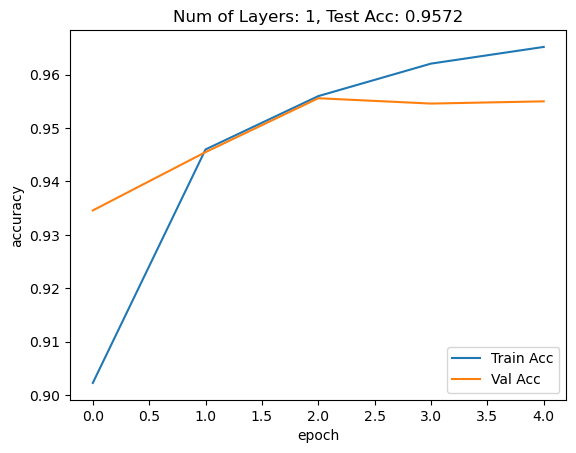

epoch: 0, loss: 2.32, train_acc: 0.05
epoch: 0, loss: 0.44, train_acc: 0.85
epoch: 0, loss: 0.29, train_acc: 0.88
epoch: 0, loss: 0.34, train_acc: 0.90
epoch: 1, loss: 0.20, train_acc: 0.94
epoch: 1, loss: 0.20, train_acc: 0.95
epoch: 1, loss: 0.25, train_acc: 0.95
epoch: 1, loss: 0.19, train_acc: 0.95
epoch: 2, loss: 0.19, train_acc: 0.94
epoch: 2, loss: 0.17, train_acc: 0.96
epoch: 2, loss: 0.21, train_acc: 0.96
epoch: 2, loss: 0.14, train_acc: 0.96
epoch: 3, loss: 0.19, train_acc: 0.95
epoch: 3, loss: 0.17, train_acc: 0.96
epoch: 3, loss: 0.15, train_acc: 0.96
epoch: 3, loss: 0.13, train_acc: 0.97
epoch: 4, loss: 0.21, train_acc: 0.94
epoch: 4, loss: 0.14, train_acc: 0.97
epoch: 4, loss: 0.18, train_acc: 0.97
epoch: 4, loss: 0.11, train_acc: 0.97


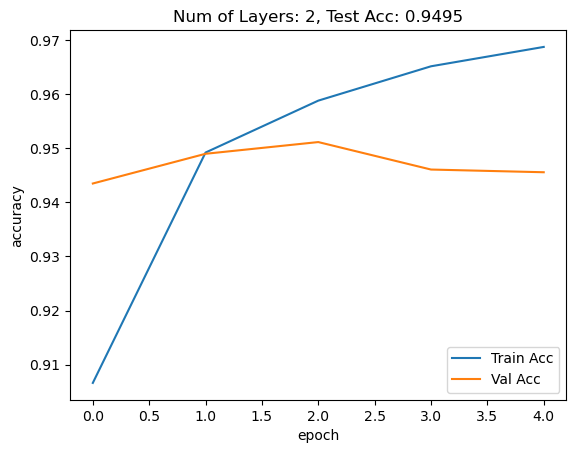

epoch: 0, loss: 2.31, train_acc: 0.11
epoch: 0, loss: 0.41, train_acc: 0.79
epoch: 0, loss: 0.35, train_acc: 0.85
epoch: 0, loss: 0.28, train_acc: 0.88
epoch: 1, loss: 0.24, train_acc: 0.94
epoch: 1, loss: 0.26, train_acc: 0.94
epoch: 1, loss: 0.24, train_acc: 0.94
epoch: 1, loss: 0.28, train_acc: 0.95
epoch: 2, loss: 0.24, train_acc: 0.95
epoch: 2, loss: 0.19, train_acc: 0.95
epoch: 2, loss: 0.23, train_acc: 0.95
epoch: 2, loss: 0.20, train_acc: 0.95
epoch: 3, loss: 0.20, train_acc: 0.96
epoch: 3, loss: 0.12, train_acc: 0.96
epoch: 3, loss: 0.19, train_acc: 0.96
epoch: 3, loss: 0.18, train_acc: 0.96
epoch: 4, loss: 0.21, train_acc: 0.95
epoch: 4, loss: 0.11, train_acc: 0.96
epoch: 4, loss: 0.15, train_acc: 0.96
epoch: 4, loss: 0.22, train_acc: 0.96


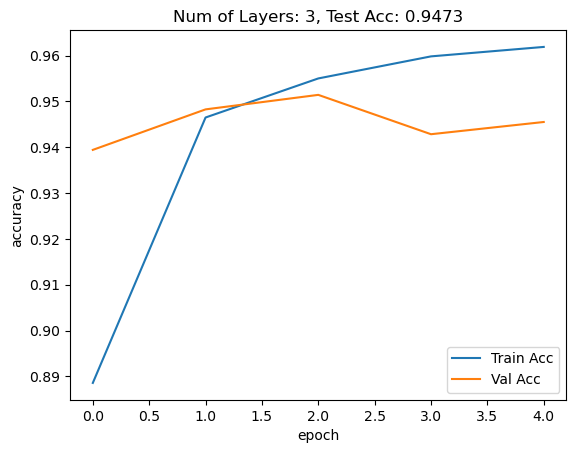

epoch: 0, loss: 2.31, train_acc: 0.04
epoch: 0, loss: 0.49, train_acc: 0.77
epoch: 0, loss: 0.34, train_acc: 0.84
epoch: 0, loss: 0.26, train_acc: 0.87
epoch: 1, loss: 0.20, train_acc: 0.95
epoch: 1, loss: 0.26, train_acc: 0.94
epoch: 1, loss: 0.26, train_acc: 0.94
epoch: 1, loss: 0.27, train_acc: 0.94
epoch: 2, loss: 0.22, train_acc: 0.94
epoch: 2, loss: 0.23, train_acc: 0.95
epoch: 2, loss: 0.15, train_acc: 0.95
epoch: 2, loss: 0.26, train_acc: 0.95
epoch: 3, loss: 0.16, train_acc: 0.95
epoch: 3, loss: 0.22, train_acc: 0.96
epoch: 3, loss: 0.14, train_acc: 0.96
epoch: 3, loss: 0.22, train_acc: 0.96
epoch: 4, loss: 0.21, train_acc: 0.95
epoch: 4, loss: 0.19, train_acc: 0.96
epoch: 4, loss: 0.12, train_acc: 0.96
epoch: 4, loss: 0.18, train_acc: 0.97


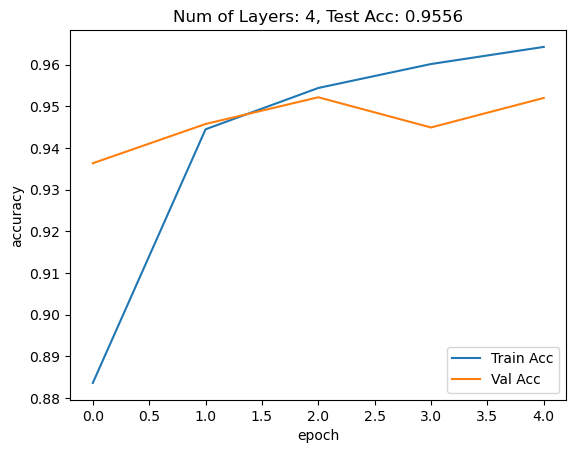

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = torch.randn(16, 28, 28)

x.shape

x = x.reshape(16, 28*28)

x.shape

train_set = datasets.MNIST("./mnist/train", train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST("./mnist/test", train=False, transform=transforms.ToTensor(), download=True)



# generate indices: instead of the actual data we pass in integers instead
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_set)),
    train_set.targets,
    stratify=train_set.targets,
    train_size=0.8,
)

# generate subset based on indices
train_split = Subset(train_set, train_indices)
val_split = Subset(train_set, val_indices)

train_loader = DataLoader(train_split, batch_size=128)
val_loader = DataLoader(val_split, batch_size=128)
test_loader = DataLoader(test_set, batch_size=128)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()

        if num_layers == 1:
            self.layers.append(nn.Linear(input_size, hidden_size))
            self.layers.append(nn.Linear(hidden_size, output_size))
        else:
            self.layers.append(nn.Linear(input_size, hidden_size))
            for i in range(num_layers - 2):
                self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.Linear(hidden_size, output_size))


    def forward(self, x):
        x = x.view(x.size(0), -1)

        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))

        x = self.layers[-1](x)

        return x

    
# Training function
def train(model, criterion, optimizer, train_loader, val_loader, n_epochs):
    train_acc, val_acc = [], []
    for epoch in range(n_epochs):
        # Training
        model.train()
        correct, total = 0, 0
        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            if idx % 100 == 0:
                print(f"epoch: {epoch}, loss: {loss:.2f}, train_acc: {(correct/total):.2f}")

        train_acc.append(correct/total)

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)

                _, predicted = torch.max(outputs.data, 1)

                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        val_acc.append(correct/total)

    return train_acc, val_acc



# Testing function
def test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)

            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct/total



# Hyperparameters
input_size = 28*28
hidden_size = 32
output_size = 10
num_layers = [1, 2, 3, 4]
n_epochs = 5
lr = 0.01

# Training, Validation, and Testing
for num_layer in num_layers:
    model = MLP(input_size, hidden_size, num_layer, output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_acc, val_acc = train(model, criterion, optimizer, train_loader, val_loader, n_epochs)
    test_acc = test(model, test_loader)
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.legend(loc='lower right')
    plt.title(f'Num of Layers: {num_layer}, Test Acc: {test_acc}')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.show()